In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.stats import chi2

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

# чтение данных
with open('data1.txt', 'r') as f:
    data = np.loadtxt(f)

df = pd.DataFrame(data)
df

C:\Users\Таня\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,0,1,2,3,4,5,6,7
0,6.0,2.0,4.0,4.0,7.0,4.0,6.0,6.0
1,10.0,10.0,9.0,9.0,9.0,9.0,10.0,9.0
2,7.0,6.0,7.0,4.0,5.0,4.0,7.0,7.0
3,7.0,5.0,6.0,6.0,7.0,6.0,8.0,7.0
4,8.0,6.0,7.0,5.0,6.0,5.0,8.0,7.0
...,...,...,...,...,...,...,...,...
95,8.0,6.0,7.0,7.0,8.0,7.0,8.0,8.0
96,6.0,3.0,4.0,4.0,6.0,4.0,7.0,6.0
97,9.0,9.0,9.0,8.0,9.0,9.0,10.0,9.0
98,6.0,4.0,6.0,3.0,5.0,4.0,7.0,6.0


In [12]:
df.describe()

,0,1,2,3,4,5,6,7
count,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000
mean,7.840000,6.36000,7.050000,6.14000,7.350000,6.430000,8.250000,7.57000
std,1.368624,2.35925,1.591486,1.95412,1.731322,2.026367,1.320965,1.19979
min,5.000000,2.00000,3.000000,3.00000,4.000000,3.000000,6.000000,5.00000
25%,7.000000,5.00000,6.000000,4.00000,6.000000,5.000000,7.000000,7.00000
50%,8.000000,6.00000,7.000000,6.00000,8.000000,6.000000,8.000000,8.00000
75%,9.000000,8.25000,8.000000,8.00000,9.000000,9.000000,9.250000,9.00000
max,10.000000,10.00000,9.000000,9.00000,10.000000,9.000000,10.000000,10.00000


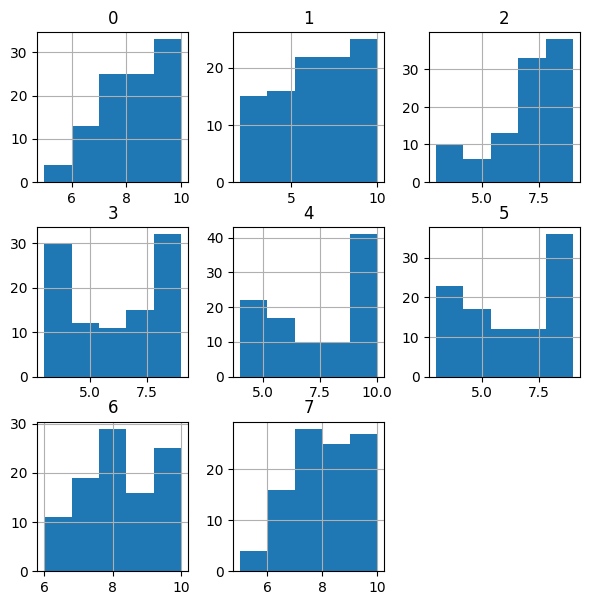

In [13]:
df.hist(bins = 5, figsize = (7, 7))
plt.show()

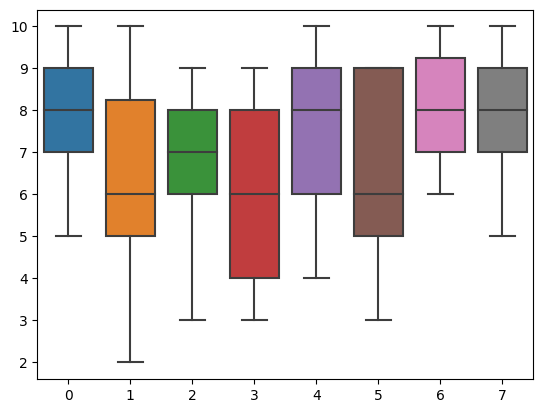

In [14]:
sns.boxplot(df)
plt.show()

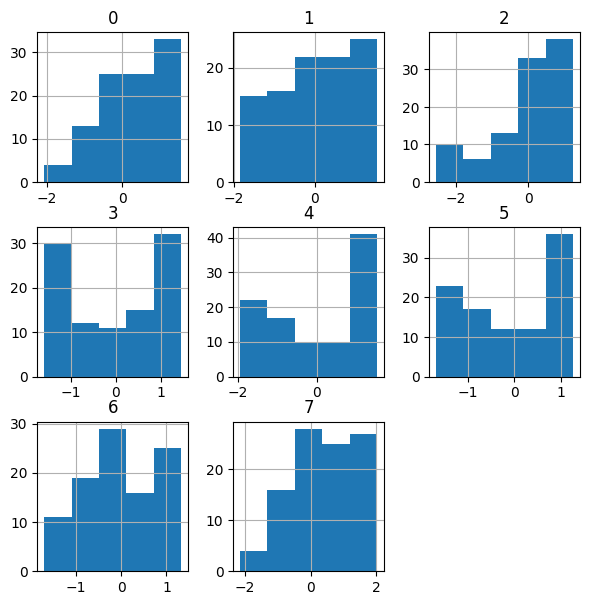

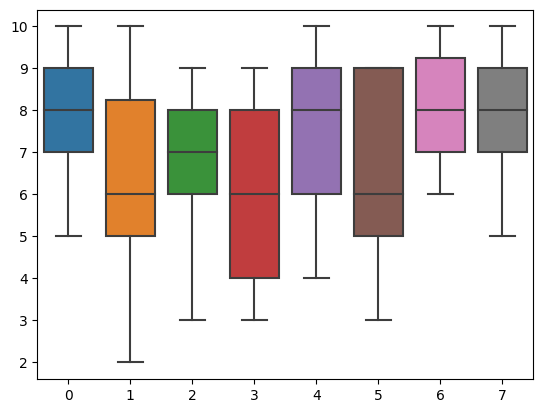

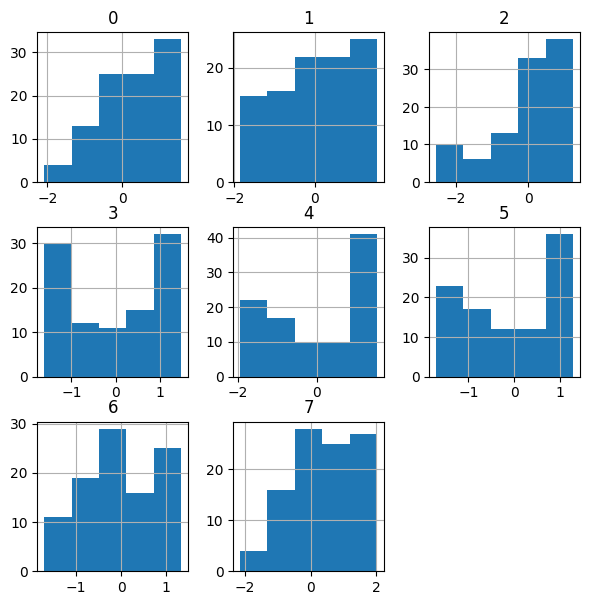

In [15]:
# Normalize data

# Custom standartization

def custom_standard_scaler(data):
    mean = data.mean(axis = 0)
    std_dev = data.std(axis = 0)
    standardized_data = (data - mean) / std_dev
    return standardized_data


df_standardized = custom_standard_scaler(df)

df_standardized.hist(bins = 5, figsize = (7, 7))
plt.show()

sns.boxplot(df)
plt.show()

scaler = StandardScaler()
df = scaler.fit_transform(df)

df = pd.DataFrame(df)

df.hist(bins = 5, figsize = (7, 7))
plt.show()

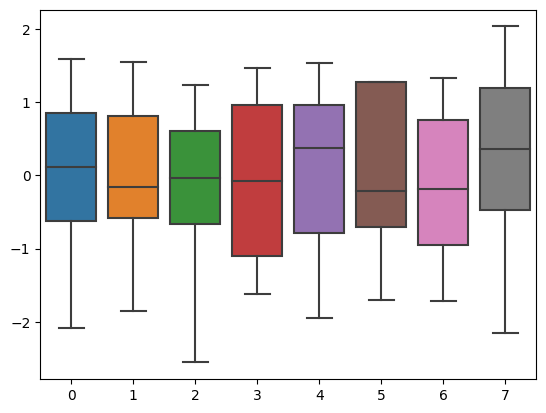

In [16]:
# And show boxplots after normalization

sns.boxplot(df)
plt.show()

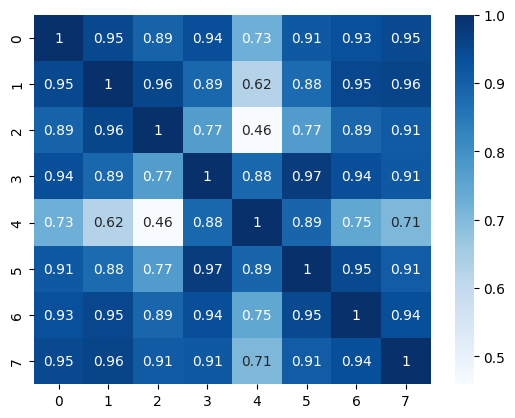

In [17]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.show()

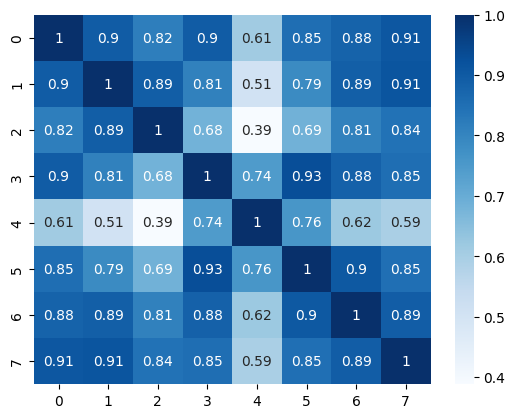

In [18]:
# And kendall corralation matrix, if we have non-linear dependence

sns.heatmap(df.corr(method = 'kendall'), cmap = 'Blues', annot = True)
plt.show()

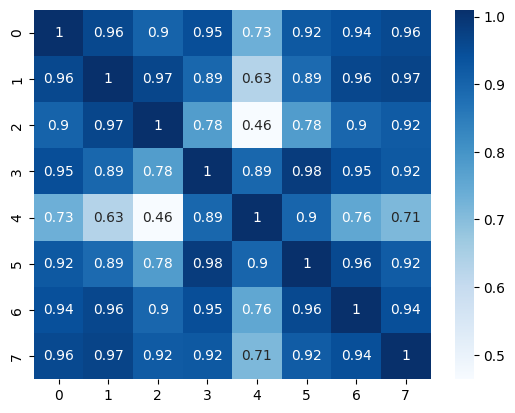

In [19]:
# Show covariance matrix
# As soon as data is normalized we get simular results as correlation matrix 

sns.heatmap(df.cov(), cmap = 'Blues', annot = True)
plt.show()

In [20]:
# Ivestigate if it's nessesary to use PCA 

cov = df.cov()

d = 0
for i in range(df.shape[1]):
    for j in range(i, df.shape[1]):
        d += cov.iloc[i, j] ** 2

d *= df.shape[0]

chi_square = chi2.ppf(0.95, df.shape[1] * (df.shape[1] - 1) / 2)

print(f"chi_square : {chi_square}, d : {d}")# Ivestigate if it's nessesary to use PCA 

cov = df.cov()

d = 0
for i in range(df.shape[1]):
    for j in range(i, df.shape[1]):
        d += cov.iloc[i, j] ** 2

d *= df.shape[0]

chi_square = chi2.ppf(0.95, df.shape[1] * (df.shape[1] - 1) / 2)

print(f"chi_square : {chi_square}, d : {d}")

chi_square : 41.33713815142739, d : 2990.1362897116733
chi_square : 41.33713815142739, d : 2990.1362897116733


In [21]:
# So d >> chi_square, we can use PCA

# Get eigenvalue and eigenvector
Lambda, A = np.linalg.eig(cov)

Z = np.dot(df, A)

# The sum of the variance of the main components
sum_Z = np.sum(np.diag(Lambda))

# The sum of the variance of the original data
sum_X = np.sum(np.var(df, axis = 0) ** 2)

print(f"PCA: {sum_Z}, primal data: {sum_X}")

PCA: 8.080808080808092, primal data: 7.999999999999998


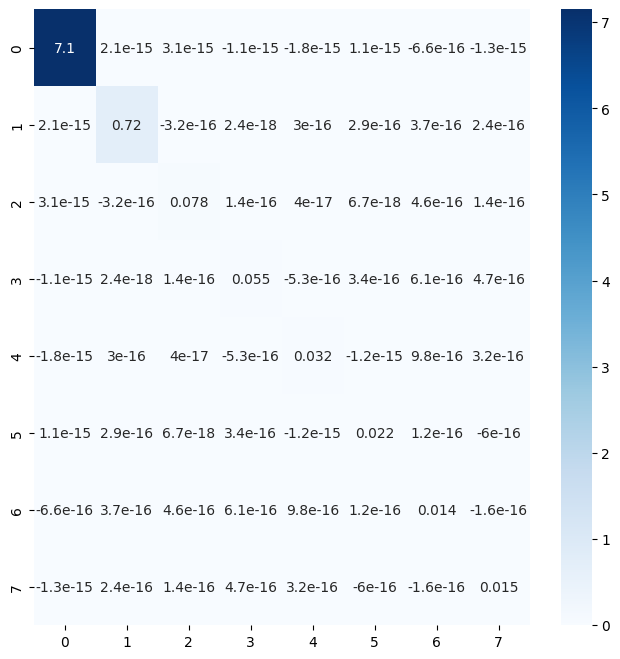

In [22]:
# Show PCA covariance matrix

Z = pd.DataFrame(Z)

plt.figure(figsize = (8, 8))
sns.heatmap(Z.cov(), cmap = 'Blues', annot = True)
plt.show()

# Show that the principal components have become orthogonal

In [23]:
# Determine the relative proportion of the spread attributable to the main components

alpha = list(Lambda[i] for i in range(df.shape[1]))

lambda_sum = np.sum(Lambda)

alpha /= lambda_sum

print(alpha)

[0.88477244 0.0884972  0.00967011 0.00674589 0.00394308 0.00272096
 0.0017357  0.00191461]


In [24]:
# The relative share of the spread attributable to the first i components

gamma = list(np.sum(Lambda[: i + 1]) for i in range(df.shape[1]))
gamma /= lambda_sum

print(gamma)

[0.88477244 0.97326965 0.98293975 0.98968564 0.99362872 0.99634969
 0.99808539 1.        ]


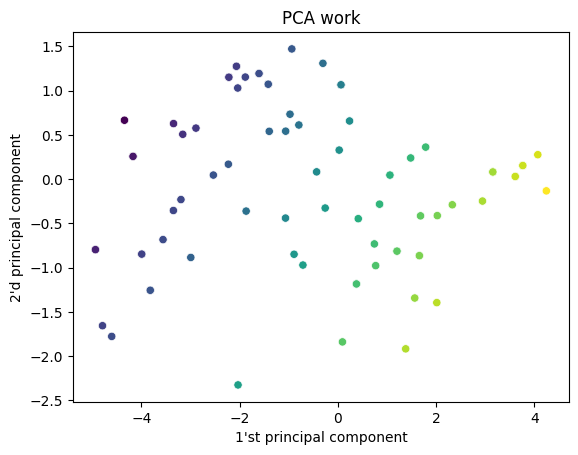

In [25]:
sns.scatterplot(x = Z.iloc[:, 0], y = Z.iloc[:, 1], c = Z.iloc[:, 0] - Z.iloc[:, 1])
plt.xlabel("1'st principal component")
plt.ylabel("2'd principal component")
plt.title("PCA work")   
plt.show()

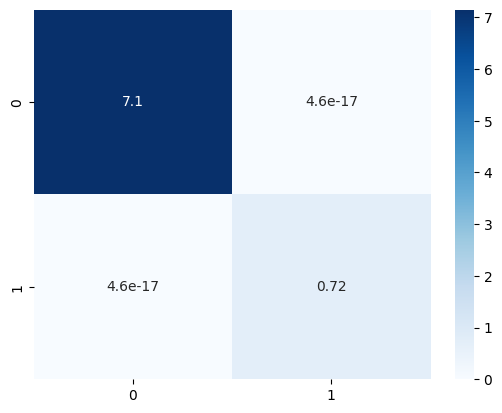

In [26]:
# Try hardcode sklearn PCA

pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df)

df_pca = pd.DataFrame(df_pca)

sns.heatmap(df_pca.cov(), annot = True, cmap = 'Blues')
plt.show()

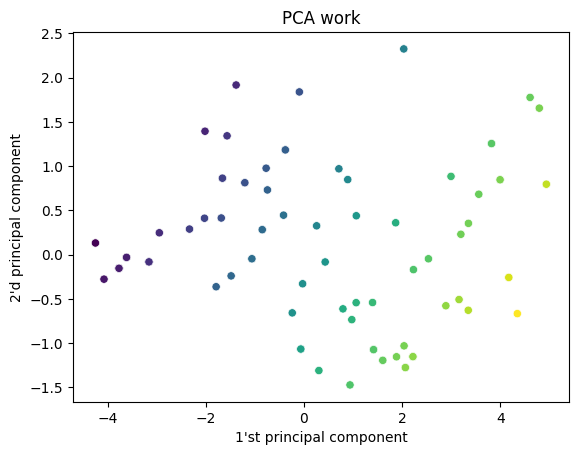

In [27]:
sns.scatterplot(x = df_pca.iloc[:, 0], y = df_pca.iloc[:, 1], c = df_pca.iloc[:, 0] - df_pca.iloc[:, 1])
plt.xlabel("1'st principal component")
plt.ylabel("2'd principal component")
plt.title("PCA work")
plt.show()

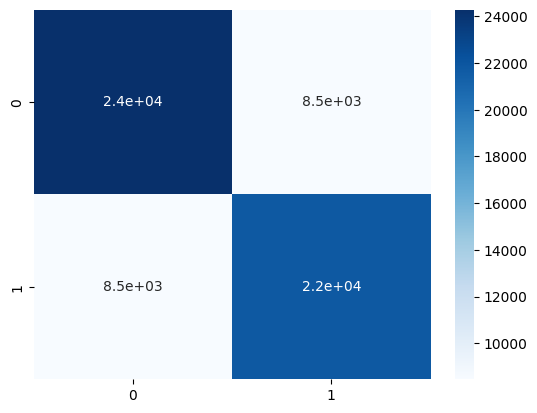

In [28]:
# Try t-sne for space reduce 

tsne = TSNE(n_components = 2)
df_tsne = tsne.fit_transform(df)
df_tsne = pd.DataFrame(df_tsne)

sns.heatmap(df_tsne.cov(), annot = True, cmap = 'Blues')
plt.show()

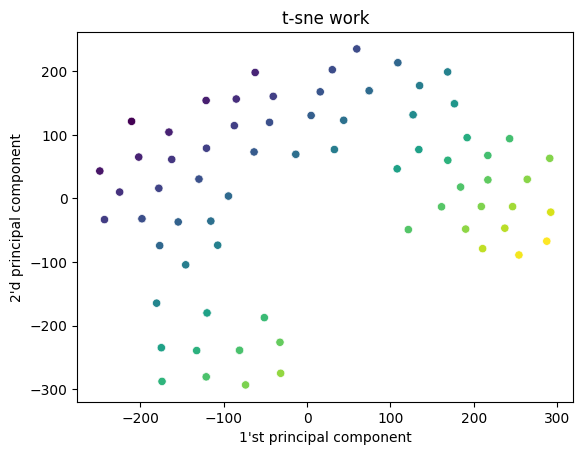

In [29]:
sns.scatterplot(x = df_tsne.iloc[:, 0], y = df_tsne.iloc[:, 1], c = df_tsne.iloc[:, 0] - df_tsne.iloc[:, 1])
plt.xlabel("1'st principal component")
plt.ylabel("2'd principal component")
plt.title("t-sne work")
plt.show()

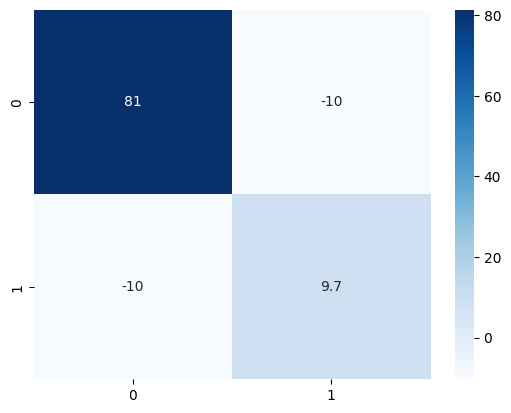

In [30]:
# And use the umap on the same dataset

umap = UMAP(n_components = 2)
df_umap = umap.fit_transform(df)
df_umap = pd.DataFrame(df_umap)

sns.heatmap(df_umap.cov(), annot = True, cmap = 'Blues')
plt.show()

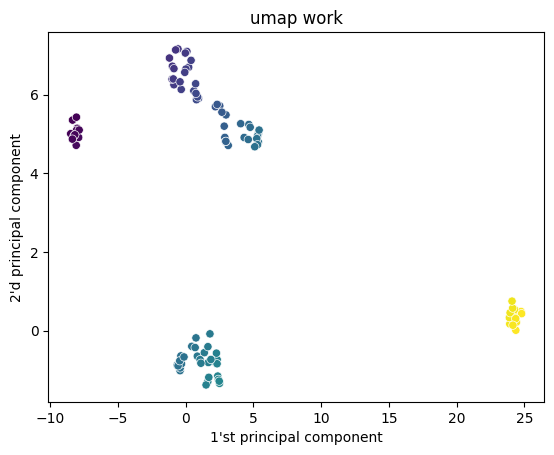

In [31]:
sns.scatterplot(x = df_umap.iloc[:, 0], y = df_umap.iloc[:, 1], c = df_umap.iloc[:, 0] - df_umap.iloc[:, 1])
plt.xlabel("1'st principal component")
plt.ylabel("2'd principal component")
plt.title("umap work")
plt.show()